In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
se_mes = np.load('secret_message.npz')

In [4]:
se_mes.files

['data', 'fs']

In [5]:
data = se_mes['data']
fs = se_mes['fs']

In [6]:
data

array([-1.6364371e-03, -1.1785750e-03, -7.8403420e-04, ...,
        5.4653932e-04,  1.7321830e-06,  5.0060858e-04], dtype=float32)

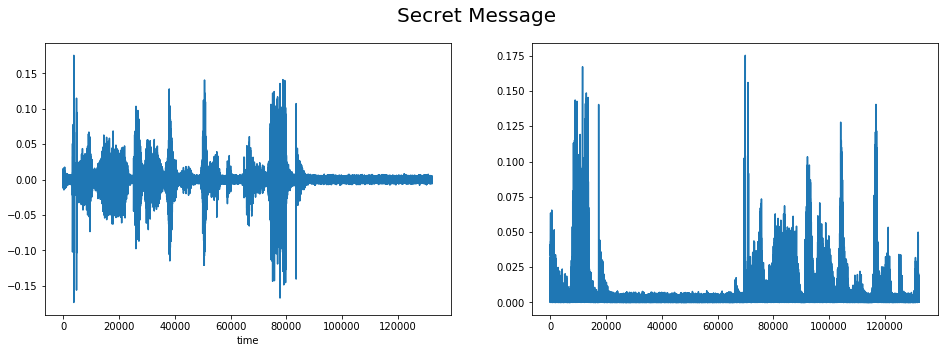

In [25]:
data_fft = np.fft.fft(data)
data_fft1 = np.fft.fftshift(data)
pows = abs(data_fft)
pows1 = abs(data_fft1)



fig = plt.figure(figsize=(16,5))                      
fig.suptitle('Secret Message',fontsize=20)  

ax1 = plt.subplot(121)
ax1.plot(data)
plt.xlabel("time")
# plt.show()
ax2 = plt.subplot(122)
ax2.plot(pows1)
# plt.xlim(-120000,120000)
plt.show()

In [6]:
!pip install sounddevice

In [12]:
import sounddevice as sd

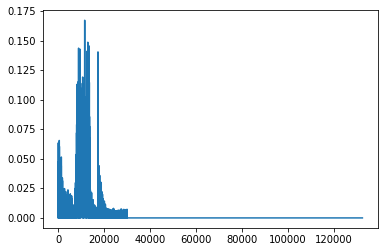

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


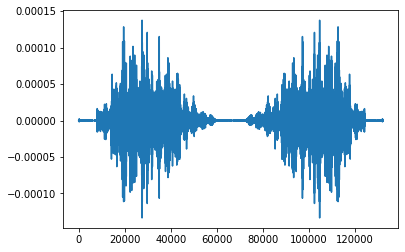

In [26]:
data_fft_filter = np.copy(data_fft1)
for i in range(int(data_fft1.size)):
    if i>30000:
        data_fft_filter[i] = 0
pows_filter = abs(data_fft_filter)
plt.plot(pows_filter)
plt.show()

data_filter = np.fft.ifft(data_fft_filter)
plt.plot(data_filter)
plt.show()

In [27]:
import wave

In [30]:
f = wave.open(r"./se_mes1.wav", "wb")

# 配置声道数、量化位数和取样频率
framerate=44100
f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(framerate)
# 将wav_data转换为二进制数据写入文件
f.writeframes(data_filter.tobytes())
f.close()